In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("obesity_data.csv")

### Exploración inicial


In [3]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [4]:
df.shape

(1000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [6]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [7]:
df.nunique()

Age                        62
Gender                      2
Height                   1000
Weight                   1000
BMI                      1000
PhysicalActivityLevel       4
ObesityCategory             4
dtype: int64

In [8]:
print('Valores únicos en Gender:') 
print(df['Gender'].unique())
print('Valores únicos en PhysicalActivityLevel:')
print(df['PhysicalActivityLevel'].unique())
print('Valores únicos en ObesityCategory:')
print(df['ObesityCategory'].unique())


Valores únicos en Gender:
['Male' 'Female']
Valores únicos en PhysicalActivityLevel:
[4 2 3 1]
Valores únicos en ObesityCategory:
['Normal weight' 'Obese' 'Overweight' 'Underweight']


In [9]:
sns.set_style("whitegrid")
sns.set_palette("bright")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


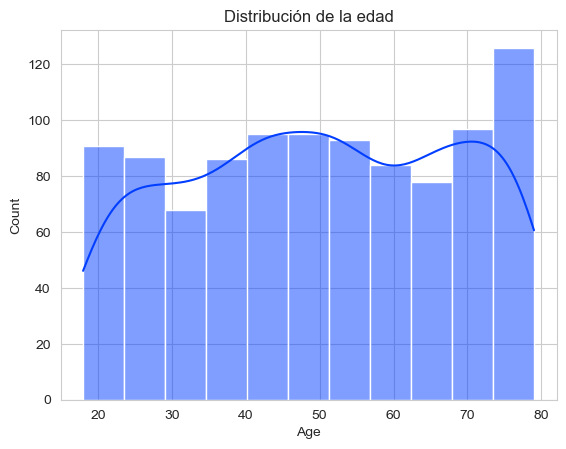

In [10]:
sns.histplot(df['Age'], kde=True)
plt.title("Distribución de la edad")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


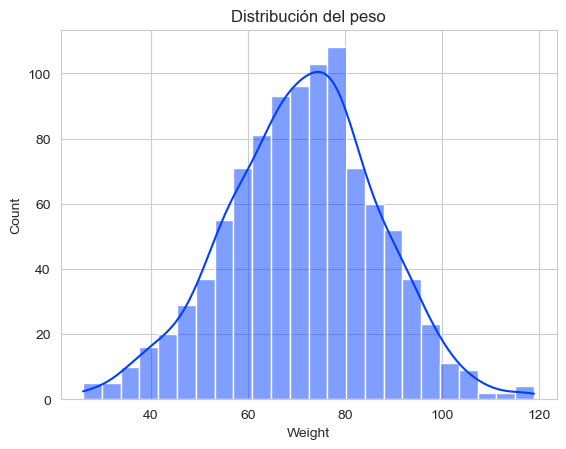

In [11]:
sns.histplot(df['Weight'], kde=True)
plt.title("Distribución del peso")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


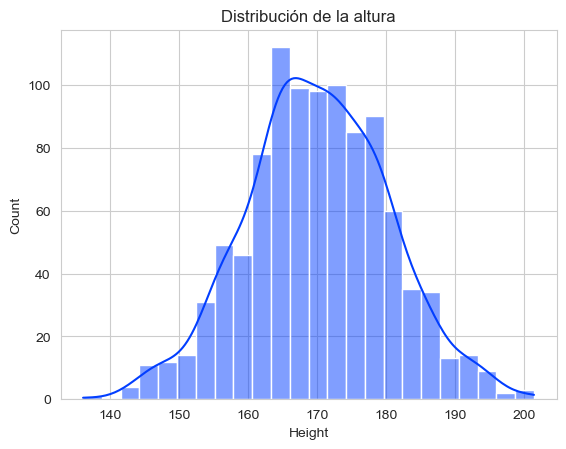

In [12]:
sns.histplot(df['Height'], kde=True)
plt.title("Distribución de la altura")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


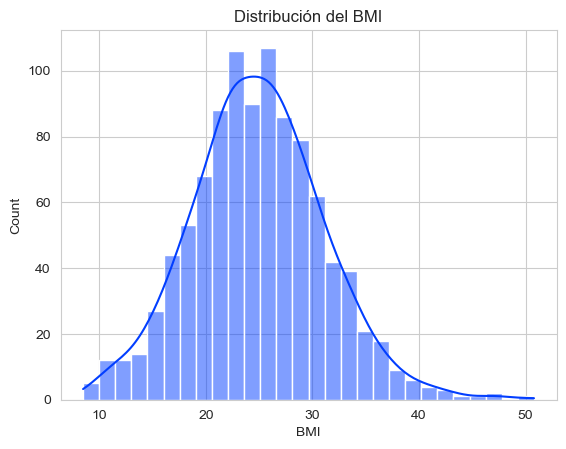

In [13]:
sns.histplot(df['BMI'], kde=True)
plt.title("Distribución del BMI")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


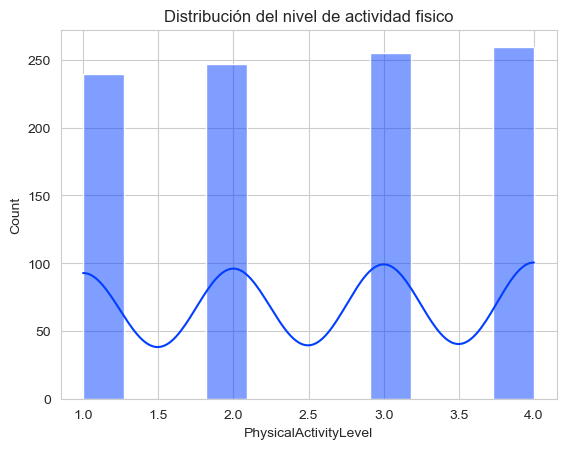

In [16]:
sns.histplot(df['PhysicalActivityLevel'], kde=True)
plt.title("Distribución del nivel de actividad fisico")
plt.show()


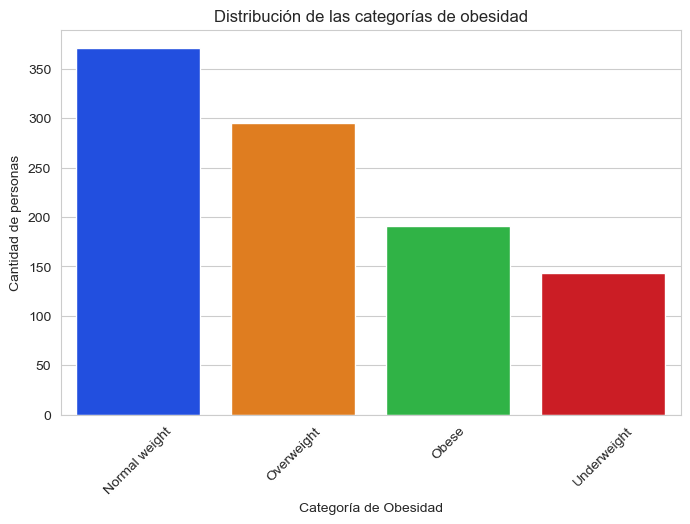

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='ObesityCategory', data=df, order=df['ObesityCategory'].value_counts().index)
plt.title("Distribución de las categorías de obesidad")
plt.xlabel("Categoría de Obesidad")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=45)  # gira etiquetas si son largas
plt.show()

In [18]:
def detect_outliers_iqr(df, columnas):
    outliers = {}
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar outliers
        outlier_rows = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        outliers[col] = outlier_rows.shape[0]  # Cantidad de outliers

        print(f"{col}: {outliers[col]} outliers encontrados")

    return outliers

num_columns= ['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel']

found_outliers = detect_outliers_iqr(df, num_columns)

Age: 0 outliers encontrados
Height: 6 outliers encontrados
Weight: 11 outliers encontrados
BMI: 14 outliers encontrados
PhysicalActivityLevel: 0 outliers encontrados


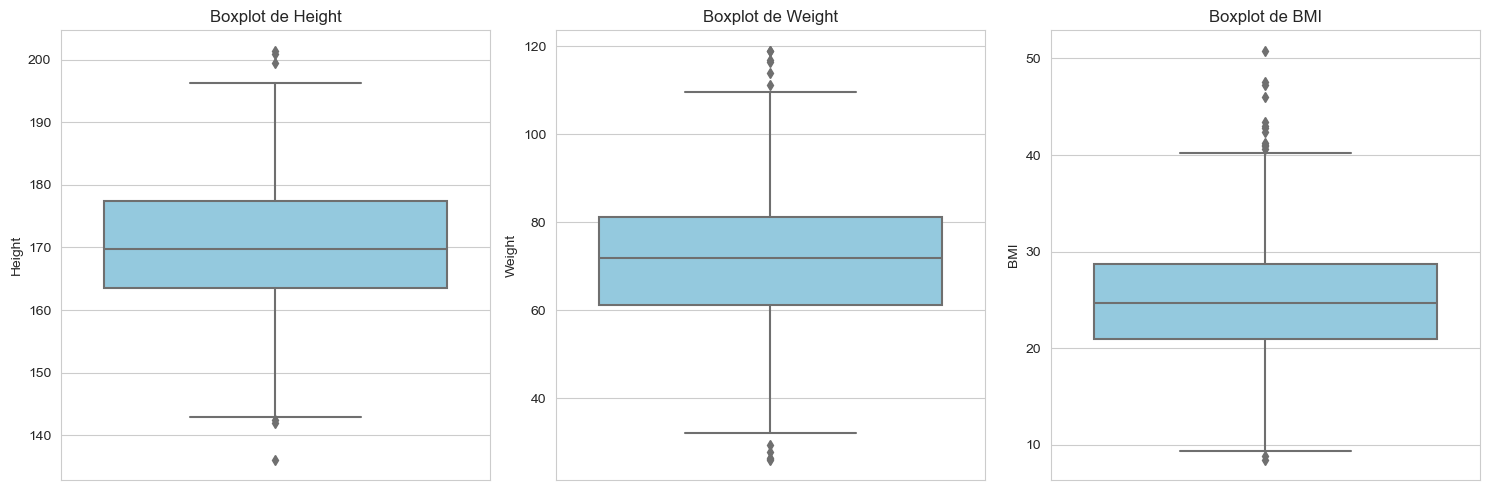

In [19]:
# Columnas con outliers
cols_with_outliers = ['Height', 'Weight', 'BMI']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(1, len(cols_with_outliers), i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

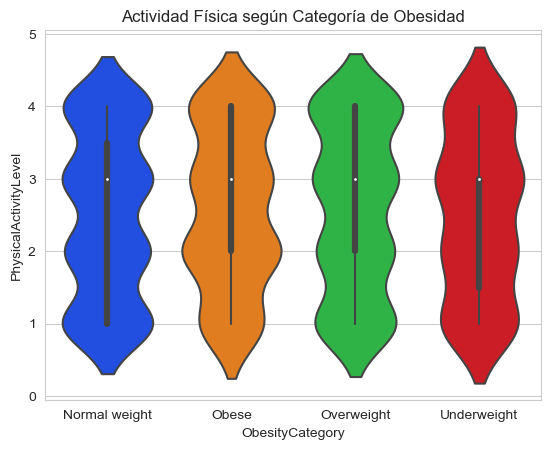

In [20]:
sns.violinplot(x='ObesityCategory', y='PhysicalActivityLevel', data=df)
plt.title("Actividad Física según Categoría de Obesidad")
plt.show()